In [1]:
import cv2
import numpy as np


def motion_vector_analysis(video_path, threshold):
    cap = cv2.VideoCapture(video_path)
    ret, frame1 = cap.read()
    prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    count = 0
    while True:
        ret, frame2 = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(
            prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0
        )
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        significant_movement = (
            np.mean(magnitude) > threshold
        )  # Set a suitable threshold
        if significant_movement:
            print("Significant motion detected, possible cut")
            count = count + 1
            print(count)

        prev_gray = gray
    cap.release()
    
    
motion_vector_analysis('data/pose_sync_ive_baddie_1.mp4', threshold=5.0)

Significant motion detected, possible cut
1
Significant motion detected, possible cut
2
Significant motion detected, possible cut
3
Significant motion detected, possible cut
4
Significant motion detected, possible cut
5
Significant motion detected, possible cut
6
Significant motion detected, possible cut
7
Significant motion detected, possible cut
8
Significant motion detected, possible cut
9
Significant motion detected, possible cut
10
Significant motion detected, possible cut
11
Significant motion detected, possible cut
12
Significant motion detected, possible cut
13
Significant motion detected, possible cut
14
Significant motion detected, possible cut
15


KeyboardInterrupt: 

In [2]:
def optical_flow_transition_detection(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print("Failed to read the video")
        return 0

    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    transition_count = 0
    frame_index = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Compute optical flow
        flow = cv2.calcOpticalFlowFarneback(
            prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0
        )
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        mean_mag = np.mean(mag)

        # Detect transition based on magnitude of flow
        if mean_mag > 10:  # Threshold for detecting significant flow, adjust as needed
            transition_count += 1
            print(
                f"Camera transition detected at frame {frame_index} with flow magnitude {mean_mag}"
            )

        prev_gray = gray
        frame_index += 1

    cap.release()
    return transition_count


# Load the video file from the uploaded path
video_path = "data/pose_sync_ive_baddie_1.mp4"
transition_count_flow = optical_flow_transition_detection(video_path)
transition_count_flow

Camera transition detected at frame 62 with flow magnitude 10.591745376586914
Camera transition detected at frame 77 with flow magnitude 11.053277969360352
Camera transition detected at frame 158 with flow magnitude 10.327264785766602
Camera transition detected at frame 159 with flow magnitude 10.075663566589355
Camera transition detected at frame 166 with flow magnitude 10.286237716674805
Camera transition detected at frame 194 with flow magnitude 10.621682167053223
Camera transition detected at frame 195 with flow magnitude 11.39816665649414
Camera transition detected at frame 196 with flow magnitude 10.99991226196289
Camera transition detected at frame 197 with flow magnitude 11.14077377319336
Camera transition detected at frame 198 with flow magnitude 11.476033210754395
Camera transition detected at frame 199 with flow magnitude 12.378703117370605
Camera transition detected at frame 200 with flow magnitude 12.281414031982422
Camera transition detected at frame 201 with flow magnitu

71

In [3]:
import cv2
import numpy as np


def filter_zoom(flow):
    # Calculate the variance of the flow angles to determine if the movement is predominantly in one direction (zoom or consistent pan).
    magnitudes, angles = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    mean_angle = np.mean(angles)
    angle_var = np.var(angles)
    # Lower variance threshold might be more sensitive to zoom-in/out.
    return angle_var < 0.3  # Adjusted variance threshold


def camera_transitions_detection(video_path, resize_factor=0.5):
    cap = cv2.VideoCapture(video_path)
    transition_count = 0
    total_frames = 0
    last_detected_frame = 0
    transition_detected = False

    ret, frame1 = cap.read()
    if not ret:
        print("Error: Failed to read video file.")
        return 0
    # Resize frame
    frame1 = cv2.resize(frame1, (0, 0), fx=resize_factor, fy=resize_factor)
    prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

    while True:
        ret, frame2 = cap.read()
        if not ret:
            break

        frame2 = cv2.resize(frame2, (0, 0), fx=resize_factor, fy=resize_factor)
        total_frames += 1
        gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(
            prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0
        )

        if not filter_zoom(flow):
            magnitude = np.mean(cv2.cartToPolar(flow[..., 0], flow[..., 1])[0])
            if magnitude > 11 and (
                total_frames - last_detected_frame > 20 or not transition_detected
            ):
                # Adjusted thresholds for detecting transitions based on testing different videos.
                transition_count += 1
                transition_detected = True
                last_detected_frame = total_frames
                print(
                    f"Camera transition detected at frame {total_frames} with flow magnitude {magnitude}"
                )
            elif total_frames - last_detected_frame > 20:
                transition_detected = False

        prev_gray = gray

    cap.release()
    return transition_count


# Load the video file from the uploaded path
video_path = "data/pose_sync_ive_baddie_1.mp4"
transition_count = camera_transitions_detection(video_path)
print(f"Total camera transitions detected: {transition_count}")

Camera transition detected at frame 14 with flow magnitude 11.249529838562012
Camera transition detected at frame 63 with flow magnitude 11.267762184143066
Camera transition detected at frame 166 with flow magnitude 11.399377822875977
Camera transition detected at frame 213 with flow magnitude 12.222000122070312
Camera transition detected at frame 262 with flow magnitude 11.09482192993164
Camera transition detected at frame 286 with flow magnitude 13.601192474365234
Camera transition detected at frame 321 with flow magnitude 11.16452407836914
Camera transition detected at frame 372 with flow magnitude 12.225753784179688
Camera transition detected at frame 521 with flow magnitude 11.507673263549805
Camera transition detected at frame 587 with flow magnitude 12.103730201721191
Camera transition detected at frame 615 with flow magnitude 13.088258743286133
Camera transition detected at frame 757 with flow magnitude 11.672015190124512
Total camera transitions detected: 12


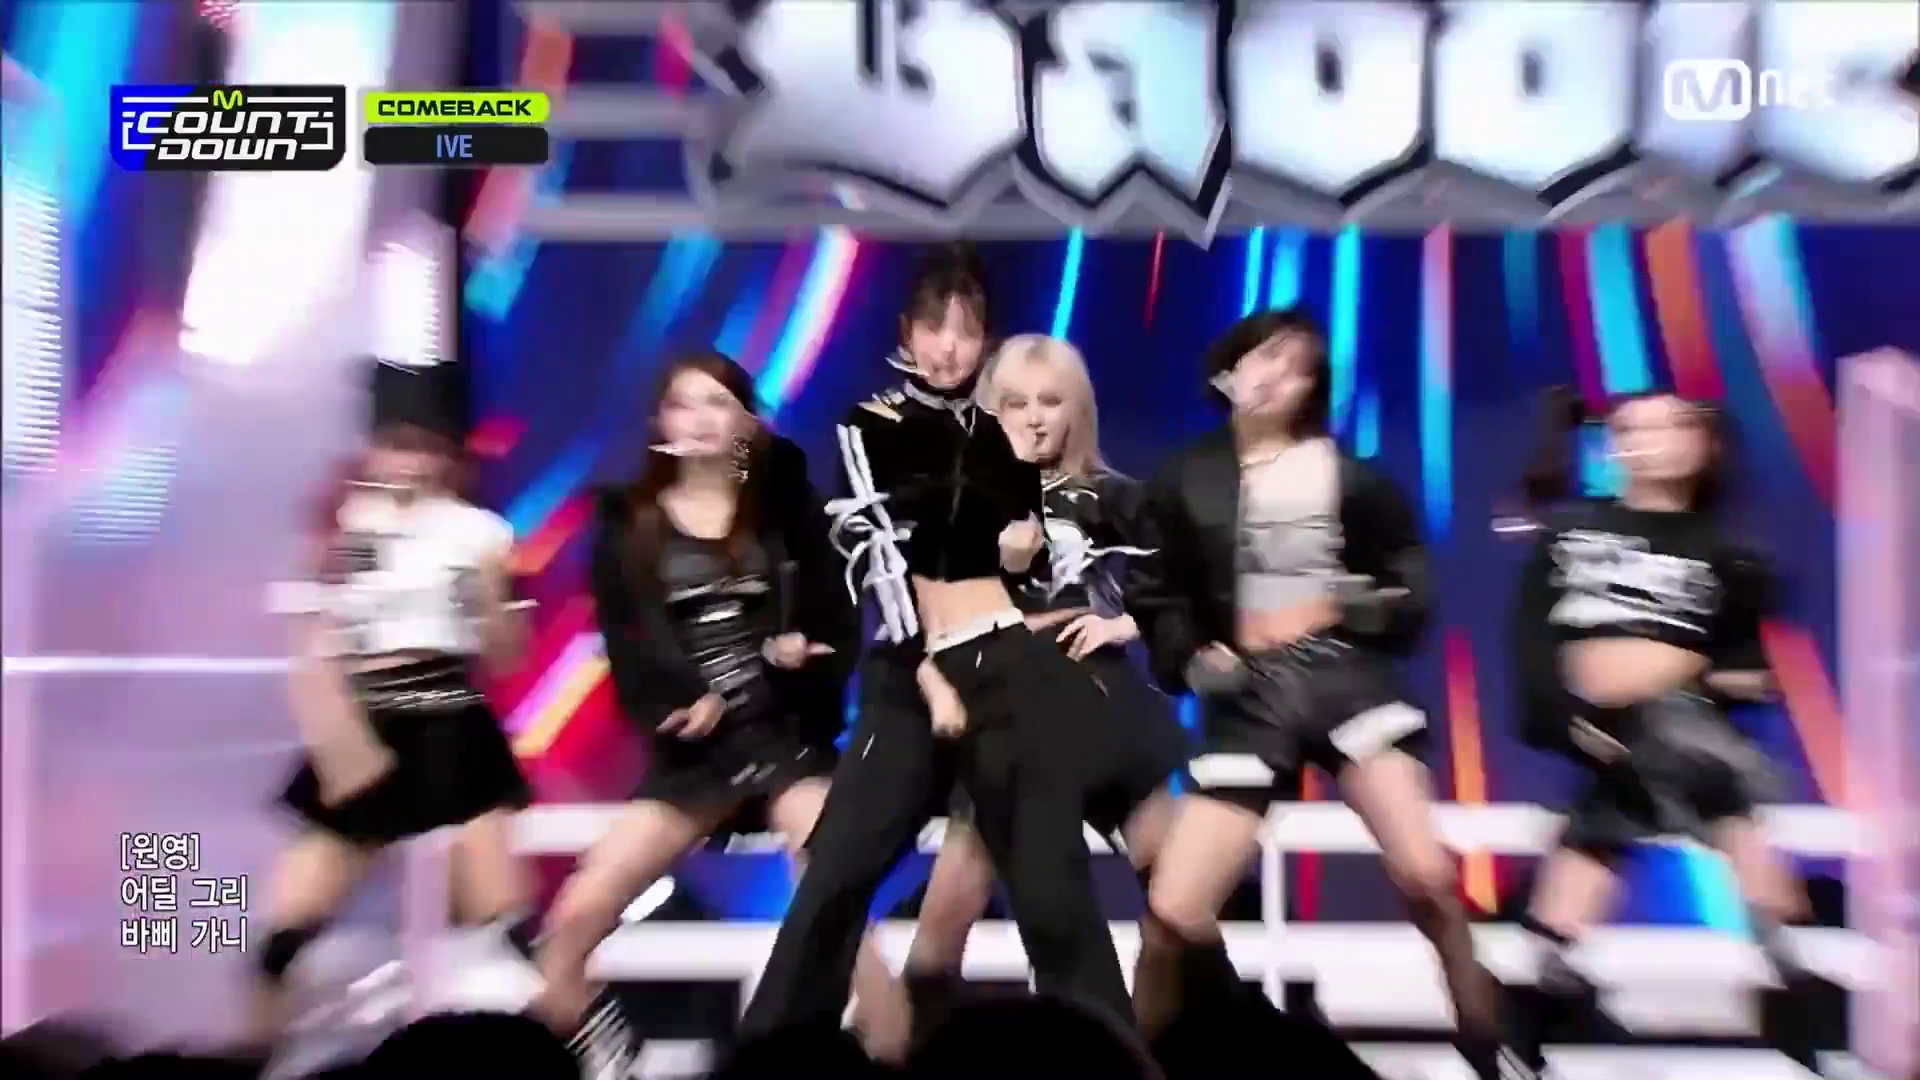

In [4]:
import cv2  # Import OpenCV library
from PIL import Image  # Import Pillow for image handling
from IPython.display import (
    display,
)  # Import display from IPython.display to show images


def show_frame(video_path, frame_number):
    # Create an object to read video files
    cap = cv2.VideoCapture(video_path)

    # Get the total number of frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Check if the requested frame number does not exceed the total number of frames
    if frame_number >= total_frames:
        print("Error: Frame number exceeds total number of frames in the video.")
        cap.release()
        return

    # Move to the specific frame in the video
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Read the frame
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        print("Failed to read the frame")
        cap.release()
        return

    # Convert the frame, which is read in BGR format by OpenCV, to RGB format
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert the frame to a PIL Image and display it
    img = Image.fromarray(frame)
    display(img)

    # Release resources
    cap.release()


# Example use
video_path = "video/ive_baddie_1.mp4"  # Path to video file
frame_number = 3163  # Frame number you want to view
show_frame(video_path, frame_number)

In [58]:
3163 / 30

105.43333333333334

## Final cut main code

In [5]:
import cv2
import numpy as np

def frame_difference_detection(
    video_path, threshold=60, resize_factor=1, aggregation_window=18
):
    cap = cv2.VideoCapture(video_path)
    transition_count = 0
    total_frames = 0
    added_frames = 0  # To keep track of how many times we've added an extra frame

    ret, frame1 = cap.read()
    if not ret:
        print("Error: Failed to read video file.")
        return 0

    # Resize frame to speed up processing
    frame1 = cv2.resize(frame1, (0, 0), fx=resize_factor, fy=resize_factor)
    prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    last_cut_frame = (
        -aggregation_window
    )  # Initialize to a value outside possible frame index

    while True:
        ret, frame2 = cap.read()
        if not ret:
            break

        frame2 = cv2.resize(frame2, (0, 0), fx=resize_factor, fy=resize_factor)
        total_frames += 1
        gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        
        # Compute the absolute difference between the current frame and the previous frame
        frame_diff = cv2.absdiff(prev_gray, gray)
        mean_diff = np.mean(frame_diff)

        # Correct frame count at every 1000th frame
        if total_frames % 1000 == 0 and total_frames // 1000 > added_frames:
            total_frames += 1
            added_frames += 1  # Update the counter for added frames

        # If the average intensity difference exceeds the threshold, it's likely a cut
        if mean_diff > threshold:
            # Aggregate close detections as a single cut
            if total_frames - last_cut_frame > aggregation_window:
                transition_count += 1
                last_cut_frame = total_frames
                
                print(
                    f"Cut detected at frame {total_frames} with average frame difference {mean_diff}"
                )

        prev_gray = gray

    cap.release()
    return transition_count

# Load the video file from the uploaded path
video_path = "data/pose_sync_ive_baddie_1.mp4"
transition_count = frame_difference_detection(video_path)
print(f"Total cuts detected: {transition_count}")


Cut detected at frame 9 with average frame difference 72.93721981095679
Cut detected at frame 31 with average frame difference 65.4583275462963
Cut detected at frame 138 with average frame difference 70.71021412037037
Cut detected at frame 360 with average frame difference 66.46466145833334
Cut detected at frame 587 with average frame difference 75.48711323302469
Cut detected at frame 684 with average frame difference 61.99895978009259
Cut detected at frame 766 with average frame difference 61.62212673611111
Total cuts detected: 7


In [70]:
frame = [263,
354,
396,
520,
579,
624,
662,
699,
751,
931,
963,
1115,
1190,
1373,
1433,
1478,
1511,
1546,
1567,
1610,
1655,
1746,
1836,
1906,
1950,
2017,
2109,
2168,
2241,
2324,
2373,
2465,
2535,
2556,
2621,
2803,
2869,
2984,
3049,
3139,
3163,
3227,
3277,
3336,
3366,
3424,
3453,
3552,
3683,
3709,
3770,
3817,
3904,
3993,
4063,
4127,
4219,
4308,
4352,
4442,
4524,
4595]

for i in frame:
    print(i, i//30, i%30)


263 8 23
354 11 24
396 13 6
520 17 10
579 19 9
624 20 24
662 22 2
699 23 9
751 25 1
931 31 1
963 32 3
1115 37 5
1190 39 20
1373 45 23
1433 47 23
1478 49 8
1511 50 11
1546 51 16
1567 52 7
1610 53 20
1655 55 5
1746 58 6
1836 61 6
1906 63 16
1950 65 0
2017 67 7
2109 70 9
2168 72 8
2241 74 21
2324 77 14
2373 79 3
2465 82 5
2535 84 15
2556 85 6
2621 87 11
2803 93 13
2869 95 19
2984 99 14
3049 101 19
3139 104 19
3163 105 13
3227 107 17
3277 109 7
3336 111 6
3366 112 6
3424 114 4
3453 115 3
3552 118 12
3683 122 23
3709 123 19
3770 125 20
3817 127 7
3904 130 4
3993 133 3
4063 135 13
4127 137 17
4219 140 19
4308 143 18
4352 145 2
4442 148 2
4524 150 24
4595 153 5


## checking frame and lmks 

In [17]:
import cv2
from insightface.app import FaceAnalysis
import numpy as np


def process_frame(video_path, frame_number):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise Exception("Failed to open video file.")

    # Check total number of frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if frame_number > total_frames:
        raise ValueError(
            f"Frame number {frame_number} exceeds total frame count of {total_frames}."
        )

    # Move to the specified frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number - 1)

    # Read the frame
    ret, frame = cap.read()
    if not ret:
        raise Exception("Failed to read the frame.")

    # Initialize the FaceAnalysis
    app = FaceAnalysis(
        allowed_modules=["detection", "landmark_2d_106"],
        providers=["CUDAExecutionProvider"],
    )
    app.prepare(ctx_id=0, det_size=(640, 640))

    # Analyze faces in the frame
    faces = app.get(frame)
    for face in faces:
        bbox = face["bbox"].astype(int)
        cv2.rectangle(frame, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)

        if "landmark_2d_106" in face:
            lmk = face["landmark_2d_106"]
            lmk = np.round(lmk).astype(np.int64)
            print(lmk[35], lmk[93])
            for point in lmk:
                cv2.circle(frame, tuple(point), 3, (200, 160, 75), 1, cv2.LINE_AA)
                cv2.line(frame, tuple(lmk[35]), tuple(lmk[93]), (255, 0, 0), 2)
                
                
    cv2.imwrite('processed_frame2.jpg', frame)
    # Display the frame
    cv2.imshow("Frame with Landmarks", frame)
    cv2.waitKey(0)  # Wait for a key press to close the displayed window
    cv2.destroyAllWindows()
    
    

    # Release the video capture object
    cap.release()


if __name__ == "__main__":
    video_path = "data/pose_sync_ive_baddie_1.mp4"  # Path to the video file
    frame_number = 675  # Frame number to analyze
    process_frame(video_path, frame_number)

c:\Users\hancomtst\AppData\Local\Programs\Python\Python310\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\hancomtst/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\hancomtst/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\hancomtst/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\hancomtst/.insightface\models\buffalo_l\genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\hancomtst/.insightface\models\buffalo_l\w600k_r50.onnx recognition
set det-size: (640, 640)
[810 325] [993 393]
